In [1]:
import numpy as np
import numpy.typing as npt
import os
import matplotlib.pyplot as plt
import seaborn as sns

import frame_whitening as fw
import frame_whitening.data as fwd
import frame_whitening.simulation as fws

In [2]:
from sklearn.datasets import fetch_olivetti_faces

In [55]:
from numpy.random import RandomState
rng = RandomState(0)
data_home = '/mnt/home/lduong/ceph/faces'
faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=rng, data_home=data_home)
n_samples, n_features = faces.shape

# Global centering (focus on one feature, centering all samples)
faces_centered = faces - faces.mean(axis=0)

# Local centering (focus on one sample, centering all features)
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

# center crop 32x32
# faces_centered = faces_centered.reshape(n_samples, 64, 64)[..., 16:48, 16:48]
skip = 2
faces_centered = faces_centered.reshape(n_samples, 64, 64)[..., ::skip, ::skip]
new_shape = faces_centered.shape[1:]
faces_centered = faces_centered.reshape(n_samples, -1)

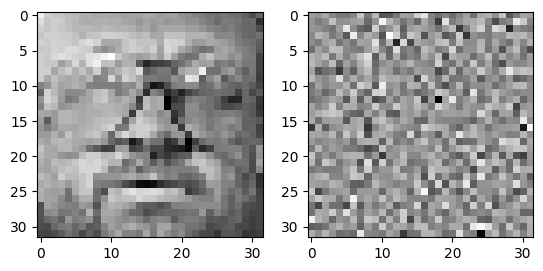

In [59]:
import scipy as sp

# whiten the data
_, s, Vh = np.linalg.svd(faces_centered, full_matrices=True, compute_uv=True)
V = Vh.T

eps = 1e-9
ss = np.zeros(np.prod(new_shape)) + eps
ss[:len(s)] = s
F = V @ np.diag(1/ss) @ Vh
F0 = faces_centered @ F

fig, ax = plt.subplots(1, 2)
idx = 0
ax[0].imshow(faces_centered[0].reshape(new_shape), cmap='gray')
ax[1].imshow(F0[0].reshape(new_shape), cmap='gray')